In [1]:
!pip3 install tensorflow
!pip3 install matplotlib
!pip3 install pandas
!pip3 install numpy

     |████████████████████████████████| 217.4 MB 3.0 MB/s eta 0:00:01   |                                | 645 kB 2.5 MB/s eta 0:01:27     |█████                           | 33.9 MB 3.0 MB/s eta 0:01:02     |█████████████████               | 114.8 MB 1.6 MB/s eta 0:01:03     |█████████████████▏              | 116.7 MB 1.6 MB/s eta 0:01:02     |█████████████████████▊          | 147.5 MB 3.1 MB/s eta 0:00:23     |███████████████████████         | 156.7 MB 3.0 MB/s eta 0:00:21     |██████████████████████████      | 176.3 MB 2.7 MB/s eta 0:00:16
     |████████████████████████████████| 1.4 MB 3.9 MB/s eta 0:00:01
     |████████████████████████████████| 462 kB 3.6 MB/s eta 0:00:01
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
     |████████████████████████████████| 4.4 MB 3.4 MB/s eta 0:00:01
     |████████████████████████████████| 13.2 MB 293 kB/s eta 0:00:01
     |████████████████████████████████| 126 kB 2.7 MB/s eta 0

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import pandas as pd
from tensorflow import keras
from tensorflow.keras.layers.experimental import preprocessing
import seaborn as sns

In [3]:
print('version',tf.__version__)

version 2.8.0


In [15]:
data_source = '/Users/im031814/Desktop/research/dataset/df_AAPL-3.csv';
file_1 = pd.read_csv(data_source, low_memory=True)
df = pd.DataFrame(file_1)
df = df[['exa', 'up', 'up_prev', 'up_next', 'ingeneo']]
df

,exa,up,up_prev,up_next,ingeneo
0,64,0,5,14,0
1,5,1,10,14,3
2,10,1,16,5,3
3,16,0,3,10,-3
4,3,0,32,16,-2
...,...,...,...,...,...
10267,12,0,42,34,-3
10268,42,0,53,12,-3
10269,53,0,2,42,-2
10270,2,0,23,53,1


In [16]:
df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10272 entries, 0 to 10271
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   exa      10272 non-null  int64
 1   up       10272 non-null  int64
 2   up_prev  10272 non-null  int64
 3   up_next  10272 non-null  int64
 4   ingeneo  10272 non-null  int64
dtypes: int64(5)
memory usage: 401.4 KB


In [17]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
exa,10272.0,32.614875,18.500965,1.0,16.0,33.0,49.0,64.0
up,10272.0,0.453563,0.497863,0.0,0.0,0.0,1.0,1.0
up_prev,10272.0,32.609034,18.500527,1.0,16.0,33.0,49.0,64.0
up_next,10272.0,32.609132,18.499952,1.0,16.0,33.0,49.0,64.0
ingeneo,10272.0,-0.326519,2.210843,-3.0,-2.0,0.0,1.0,3.0


<AxesSubplot:xlabel='up', ylabel='count'>

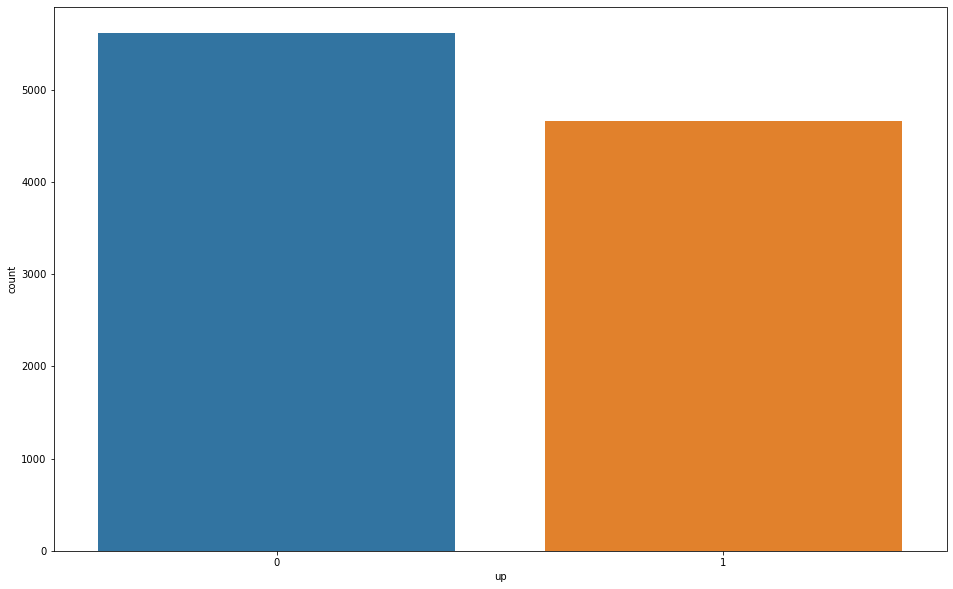

In [18]:
plt.figure(figsize = (16,10))
sns.countplot(x='up',data=df)

<AxesSubplot:>

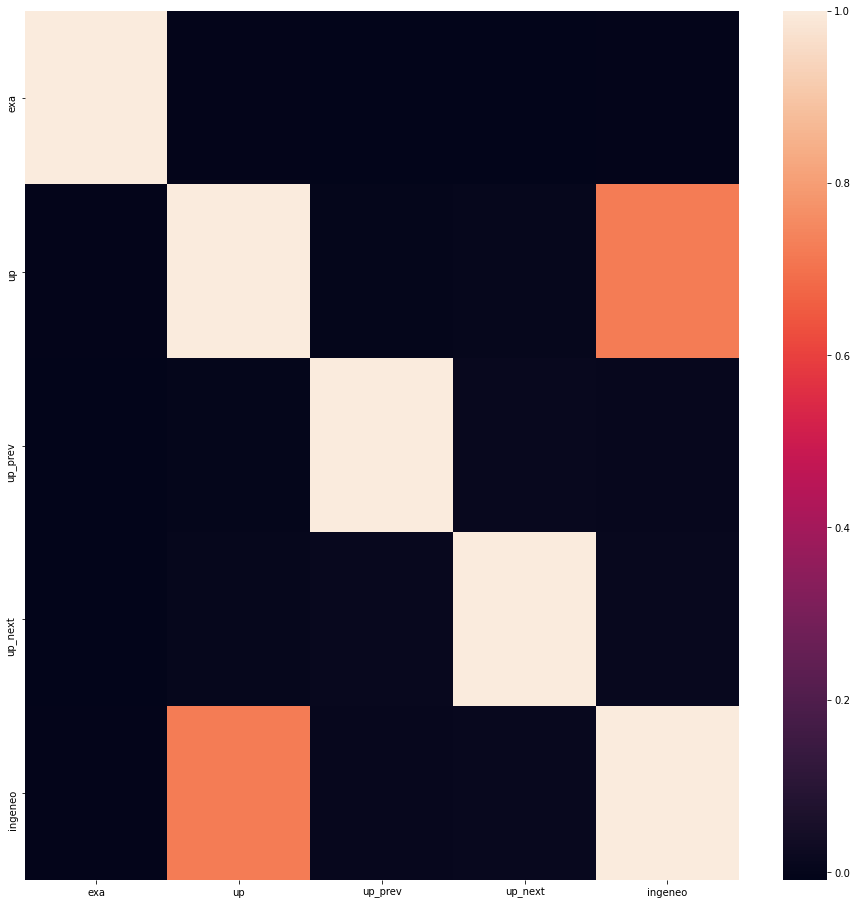

In [19]:
plt.figure(figsize = (16,16))
# df = df.drop(['count', 'Unknown', 'range_author_PR_within28'], axis=1)
sns.heatmap(df.corr())

In [20]:
df.corr(method ='kendall')['up'].sort_values()

exa       -0.001731
up_prev    0.000884
up_next    0.002733
ingeneo    0.640694
up         1.000000
Name: up, dtype: float64

In [21]:
df.corr()['up'].sort_values()

exa       -0.002100
up_prev    0.001084
up_next    0.003341
ingeneo    0.720749
up         1.000000
Name: up, dtype: float64

<AxesSubplot:>

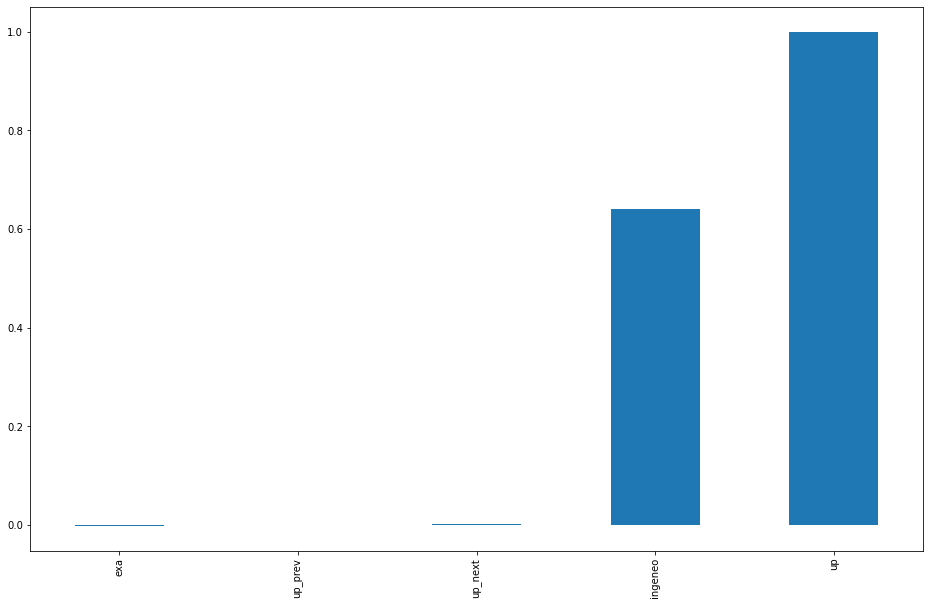

In [22]:
plt.figure(figsize = (16,10))
df.corr('kendall')['up'].sort_values().plot(kind='bar')

In [80]:
from sklearn.model_selection import train_test_split

X = df[['ingeneo', 'exa','up_prev', 'up_next']]
# Label
y = df['up'].values
# Split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.5,random_state=84)

In [81]:
X_train.shape
X_test.shape
y_train.shape
y_test.shape

(5136,)

In [82]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout

In [83]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
print(X_train)

[[0.83333333 0.06349206 0.6031746  0.31746032]
 [0.5        0.26984127 1.         0.53968254]
 [1.         0.03174603 0.80952381 0.92063492]
 ...
 [1.         0.25396825 0.93650794 0.19047619]
 [1.         0.77777778 1.         0.52380952]
 [0.         0.6031746  0.19047619 0.23809524]]


In [84]:
model = Sequential()

model.add(Dense(2,activation='relu'))
# dropout is uncommented if dataframe is very unbalanced 
# model.add(Dropout(0.5))
# model.add(Dense(62,activation='relu'))
# model.add(Dropout(0.5))
# model.add(Dense(16,activation='relu'))
# model.add(Dropout(0.5))
model.add(Dense(4,activation='relu'))
# model.add(Dense(4,activation='relu'))
model.add(Dense(units=1,activation='sigmoid'))
# lr=0.01, momentum=0.9, decay=0.01
# from tensorflow.keras.optimizers import Adam
# opt = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
model.compile(optimizer='adam',loss=tf.keras.losses.BinaryCrossentropy(),metrics=['accuracy','mae'])

In [85]:
from tensorflow.keras.callbacks import ModelCheckpoint
filepath = 'my_best_model_1_loss_14_Days'
filepath2 = 'my_best_model_1_accuracy_14_Days'
checkpoint = ModelCheckpoint(filepath=filepath, 
                             monitor='val_loss',
                             verbose=1, 
                             save_best_only=True,
                             mode='min')
checkpoint2 = ModelCheckpoint(filepath=filepath2, 
                             monitor='val_accuracy',
                             verbose=1, 
                             save_best_only=True,
                             mode='max')

In [86]:
from keras.callbacks import EarlyStopping
callbacks = [checkpoint,checkpoint2, EarlyStopping(patience=25, monitor="val_loss")]

In [87]:
history = model.fit(x=X_train,y=y_train, epochs=2500, batch_size=4,validation_data=(X_test, y_test), callbacks=callbacks
          );

Epoch 1/2500
1221/1284 [===========================>..] - ETA: 0s - loss: 0.6083 - accuracy: 0.7344 - mae: 0.4473
Epoch 1: val_loss improved from inf to 0.46594, saving model to my_best_model_1_loss_14_Days
INFO:tensorflow:Assets written to: my_best_model_1_loss_14_Days/assets

Epoch 1: val_accuracy improved from -inf to 0.80646, saving model to my_best_model_1_accuracy_14_Days
INFO:tensorflow:Assets written to: my_best_model_1_accuracy_14_Days/assets
1284/1284 [==============================] - 3s 2ms/step - loss: 0.6024 - accuracy: 0.7373 - mae: 0.4430 - val_loss: 0.4659 - val_accuracy: 0.8065 - val_mae: 0.3477
Epoch 2/2500
1243/1284 [============================>.] - ETA: 0s - loss: 0.4263 - accuracy: 0.7977 - mae: 0.3022
Epoch 2: val_loss improved from 0.46594 to 0.39196, saving model to my_best_model_1_loss_14_Days
INFO:tensorflow:Assets written to: my_best_model_1_loss_14_Days/assets

Epoch 2: val_accuracy improved from 0.80646 to 0.81133, saving model to my_best_model_1_accuracy


Epoch 18: val_accuracy did not improve from 0.81133
1284/1284 [==============================] - 2s 1ms/step - loss: 0.3792 - accuracy: 0.8033 - mae: 0.2438 - val_loss: 0.3705 - val_accuracy: 0.8014 - val_mae: 0.2391
Epoch 19/2500
1261/1284 [============================>.] - ETA: 0s - loss: 0.3773 - accuracy: 0.8021 - mae: 0.2430
Epoch 19: val_loss did not improve from 0.36840

Epoch 19: val_accuracy did not improve from 0.81133
1284/1284 [==============================] - 2s 1ms/step - loss: 0.3799 - accuracy: 0.8010 - mae: 0.2444 - val_loss: 0.3697 - val_accuracy: 0.8078 - val_mae: 0.2371
Epoch 20/2500
1279/1284 [============================>.] - ETA: 0s - loss: 0.3788 - accuracy: 0.8051 - mae: 0.2436
Epoch 20: val_loss did not improve from 0.36840

Epoch 20: val_accuracy did not improve from 0.81133
1284/1284 [==============================] - 2s 1ms/step - loss: 0.3789 - accuracy: 0.8053 - mae: 0.2436 - val_loss: 0.3714 - val_accuracy: 0.8078 - val_mae: 0.2376
Epoch 21/2500
1232/1

Epoch 40/2500
1284/1284 [==============================] - ETA: 0s - loss: 0.3796 - accuracy: 0.8020 - mae: 0.2435
Epoch 40: val_loss did not improve from 0.36840

Epoch 40: val_accuracy did not improve from 0.81133
1284/1284 [==============================] - 2s 1ms/step - loss: 0.3796 - accuracy: 0.8020 - mae: 0.2435 - val_loss: 0.3693 - val_accuracy: 0.8078 - val_mae: 0.2374


In [88]:
model_loss = pd.DataFrame(model.history.history)

<AxesSubplot:>

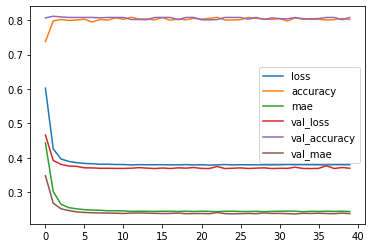

In [89]:
model_loss.plot()

In [90]:
training_score = model.evaluate(X_train,y_train)
test_score = model.evaluate(X_test,y_test)

161/161 [==============================] - 0s 879us/step - loss: 0.3693 - accuracy: 0.8078 - mae: 0.2374


In [91]:
from sklearn.metrics import classification_report
predictions = (model.predict(X_test) > 0.5).astype("int32")
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.91      0.72      0.80      2800
           1       0.73      0.91      0.81      2336

    accuracy                           0.81      5136
   macro avg       0.82      0.82      0.81      5136
weighted avg       0.83      0.81      0.81      5136



In [92]:
predictions = (model.predict(X_train) > 0.5).astype("int32")
print(classification_report(y_train,predictions))

              precision    recall  f1-score   support

           0       0.92      0.72      0.81      2813
           1       0.73      0.92      0.82      2323

    accuracy                           0.81      5136
   macro avg       0.82      0.82      0.81      5136
weighted avg       0.83      0.81      0.81      5136



In [93]:
predictions = (model.predict(X_train) > 0.5).astype("int32")
print(classification_report(y_train,predictions))

              precision    recall  f1-score   support

           0       0.92      0.72      0.81      2813
           1       0.73      0.92      0.82      2323

    accuracy                           0.81      5136
   macro avg       0.82      0.82      0.81      5136
weighted avg       0.83      0.81      0.81      5136

